In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torchvision.utils as tutils
from torch.autograd import Variable

In [2]:
np.random.seed(567)
torch.manual_seed(43)
torch.cuda.manual_seed(1427)

In [3]:
'''
LOADING DATASET
'''
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = dsets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = dsets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
print("Training dataset contains %d items" % len(train_dataset))
print("Testing dataset contains %d items" % len(test_dataset))

Training dataset contains 60000 items
Testing dataset contains 10000 items


In [4]:
'''
MAKING DATASET ITERABLE
'''
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
tensor([4, 2, 0, 6, 3, 2, 7, 5, 0, 6])
tensor([5, 2, 8, 3, 9, 6, 1, 1, 8, 1])
tensor([3, 9, 0, 9, 8, 9, 2, 0, 3, 5])
tensor([9, 8, 0, 7, 4, 7, 4, 9, 8, 0])
tensor([1, 0, 5, 1, 0, 0, 4, 5, 5, 8])
tensor([5, 6, 8, 8, 9, 6, 9, 8, 4, 3])
tensor([0, 4, 7, 8, 0, 6, 2, 9, 2, 3])
tensor([8, 4, 5, 4, 7, 2, 8, 7, 6, 0])
tensor([7, 8, 3, 2, 6, 3, 5, 8, 8, 9])
tensor([8, 8, 2, 8, 4, 8, 8, 1, 9, 4])


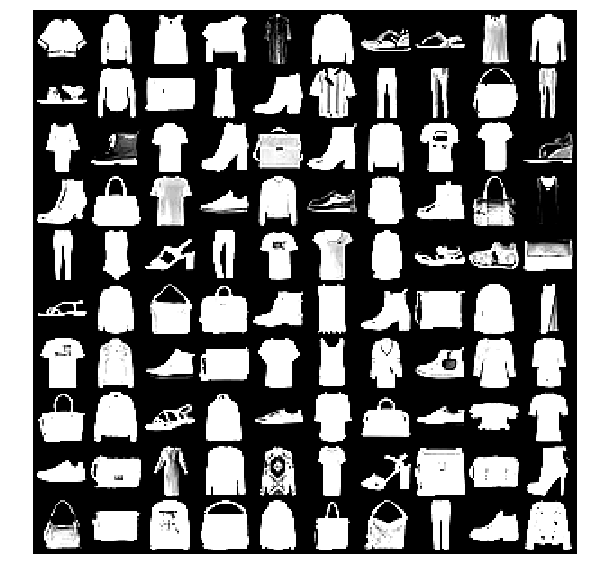

In [5]:
'''
VISUALIZING DATASET
'''
all_items = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
image_h, image_w = 10, 10

print(all_items)
for _, (images, labels) in enumerate(train_loader):
    for i in range(image_h):
        print(labels[image_w * i:image_w * (i + 1)])
    images = tutils.make_grid(images, nrow=image_h, range=(-1., 1.))
    npimages = images.numpy()
    fig, ax = plt.subplots(figsize=(image_h, image_w))
    plt.axis('off')
    ax.imshow(np.transpose(npimages, (1, 2, 0)), interpolation='nearest')
    break

In [6]:
'''
BUILDING MODEL
'''
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=0)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=0)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(32*4*4, 10)
    
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc1(out)
        
        return out

In [14]:
'''
TRAINING MODEL
'''
model = CNNModel()
learning_rate = 0.001
num_epochs = 30
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    total_loss = 0.
    for images, labels in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss = total_loss / len(train_loader)
    total_loss = 0.
    for images, labels in test_loader:
        total_loss += criterion(model(images), labels).item()
    test_loss = total_loss / len(test_loader)
        
    print('Epoch number %d, Training loss = %.2f, Testing loss = %.2f' % (epoch, train_loss, test_loss))

Epoch number 0, Training loss = 0.63, Testing loss = 0.49
Epoch number 1, Training loss = 0.43, Testing loss = 0.42
Epoch number 2, Training loss = 0.40, Testing loss = 0.41
Epoch number 3, Training loss = 0.37, Testing loss = 0.40
Epoch number 4, Training loss = 0.36, Testing loss = 0.39
Epoch number 5, Training loss = 0.35, Testing loss = 0.37
Epoch number 6, Training loss = 0.34, Testing loss = 0.36
Epoch number 7, Training loss = 0.33, Testing loss = 0.37
Epoch number 8, Training loss = 0.32, Testing loss = 0.37
Epoch number 9, Training loss = 0.32, Testing loss = 0.35
Epoch number 10, Training loss = 0.31, Testing loss = 0.35
Epoch number 11, Training loss = 0.30, Testing loss = 0.36
Epoch number 12, Training loss = 0.30, Testing loss = 0.35
Epoch number 13, Training loss = 0.30, Testing loss = 0.34
Epoch number 14, Training loss = 0.29, Testing loss = 0.34
Epoch number 15, Training loss = 0.29, Testing loss = 0.35
Epoch number 16, Training loss = 0.29, Testing loss = 0.33
Epoch n